In [2]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Target Account
target_terms = ("@BBC", "@CBS", "@CNN",
                "@FoxNews", "@NYTimes")
# Counter
#counter = 0

# Variables for holding sentiments
sentiments = []

for target in target_terms:

# Variable for max_id
    oldest_tweet = None
    counter = 0


# Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):
      

    # Get all tweets from home feed
        public_tweets = api.user_timeline(target, max_id = oldest_tweet)
 

    # Loop through all tweets 
        for tweet in public_tweets:

        # Print Tweets
        # print("Tweet {counter}: {tweet["text"]})
        
        # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
        
        # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1
        # Add to counter 
            counter += 1
            
        # Add sentiments for each tweet into a list
            sentiments.append({"Company": target, 
                               "Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        


In [4]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.to_csv("MediaTweets.csv")
sentiments_pd

,Company,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,@BBC,0.0000,Thu Oct 04 20:06:04 +0000 2018,1.000,0.000,0.000,1
1,@BBC,-0.5209,Thu Oct 04 19:01:08 +0000 2018,0.684,0.218,0.097,2
2,@BBC,0.0000,Thu Oct 04 18:01:09 +0000 2018,1.000,0.000,0.000,3
3,@BBC,-0.6124,Thu Oct 04 17:11:06 +0000 2018,0.654,0.250,0.096,4
4,@BBC,0.4215,Thu Oct 04 16:03:07 +0000 2018,0.714,0.000,0.286,5
5,@BBC,-0.4588,Thu Oct 04 15:29:47 +0000 2018,0.670,0.242,0.088,6
6,@BBC,0.0000,Thu Oct 04 14:01:23 +0000 2018,1.000,0.000,0.000,7
7,@BBC,0.1531,Thu Oct 04 13:03:03 +0000 2018,0.890,0.000,0.110,8
8,@BBC,-0.2500,Thu Oct 04 12:02:05 +0000 2018,0.429,0.357,0.214,9
9,@BBC,0.4404,Thu Oct 04 11:28:10 +0000 2018,0.813,0.000,0.187,10


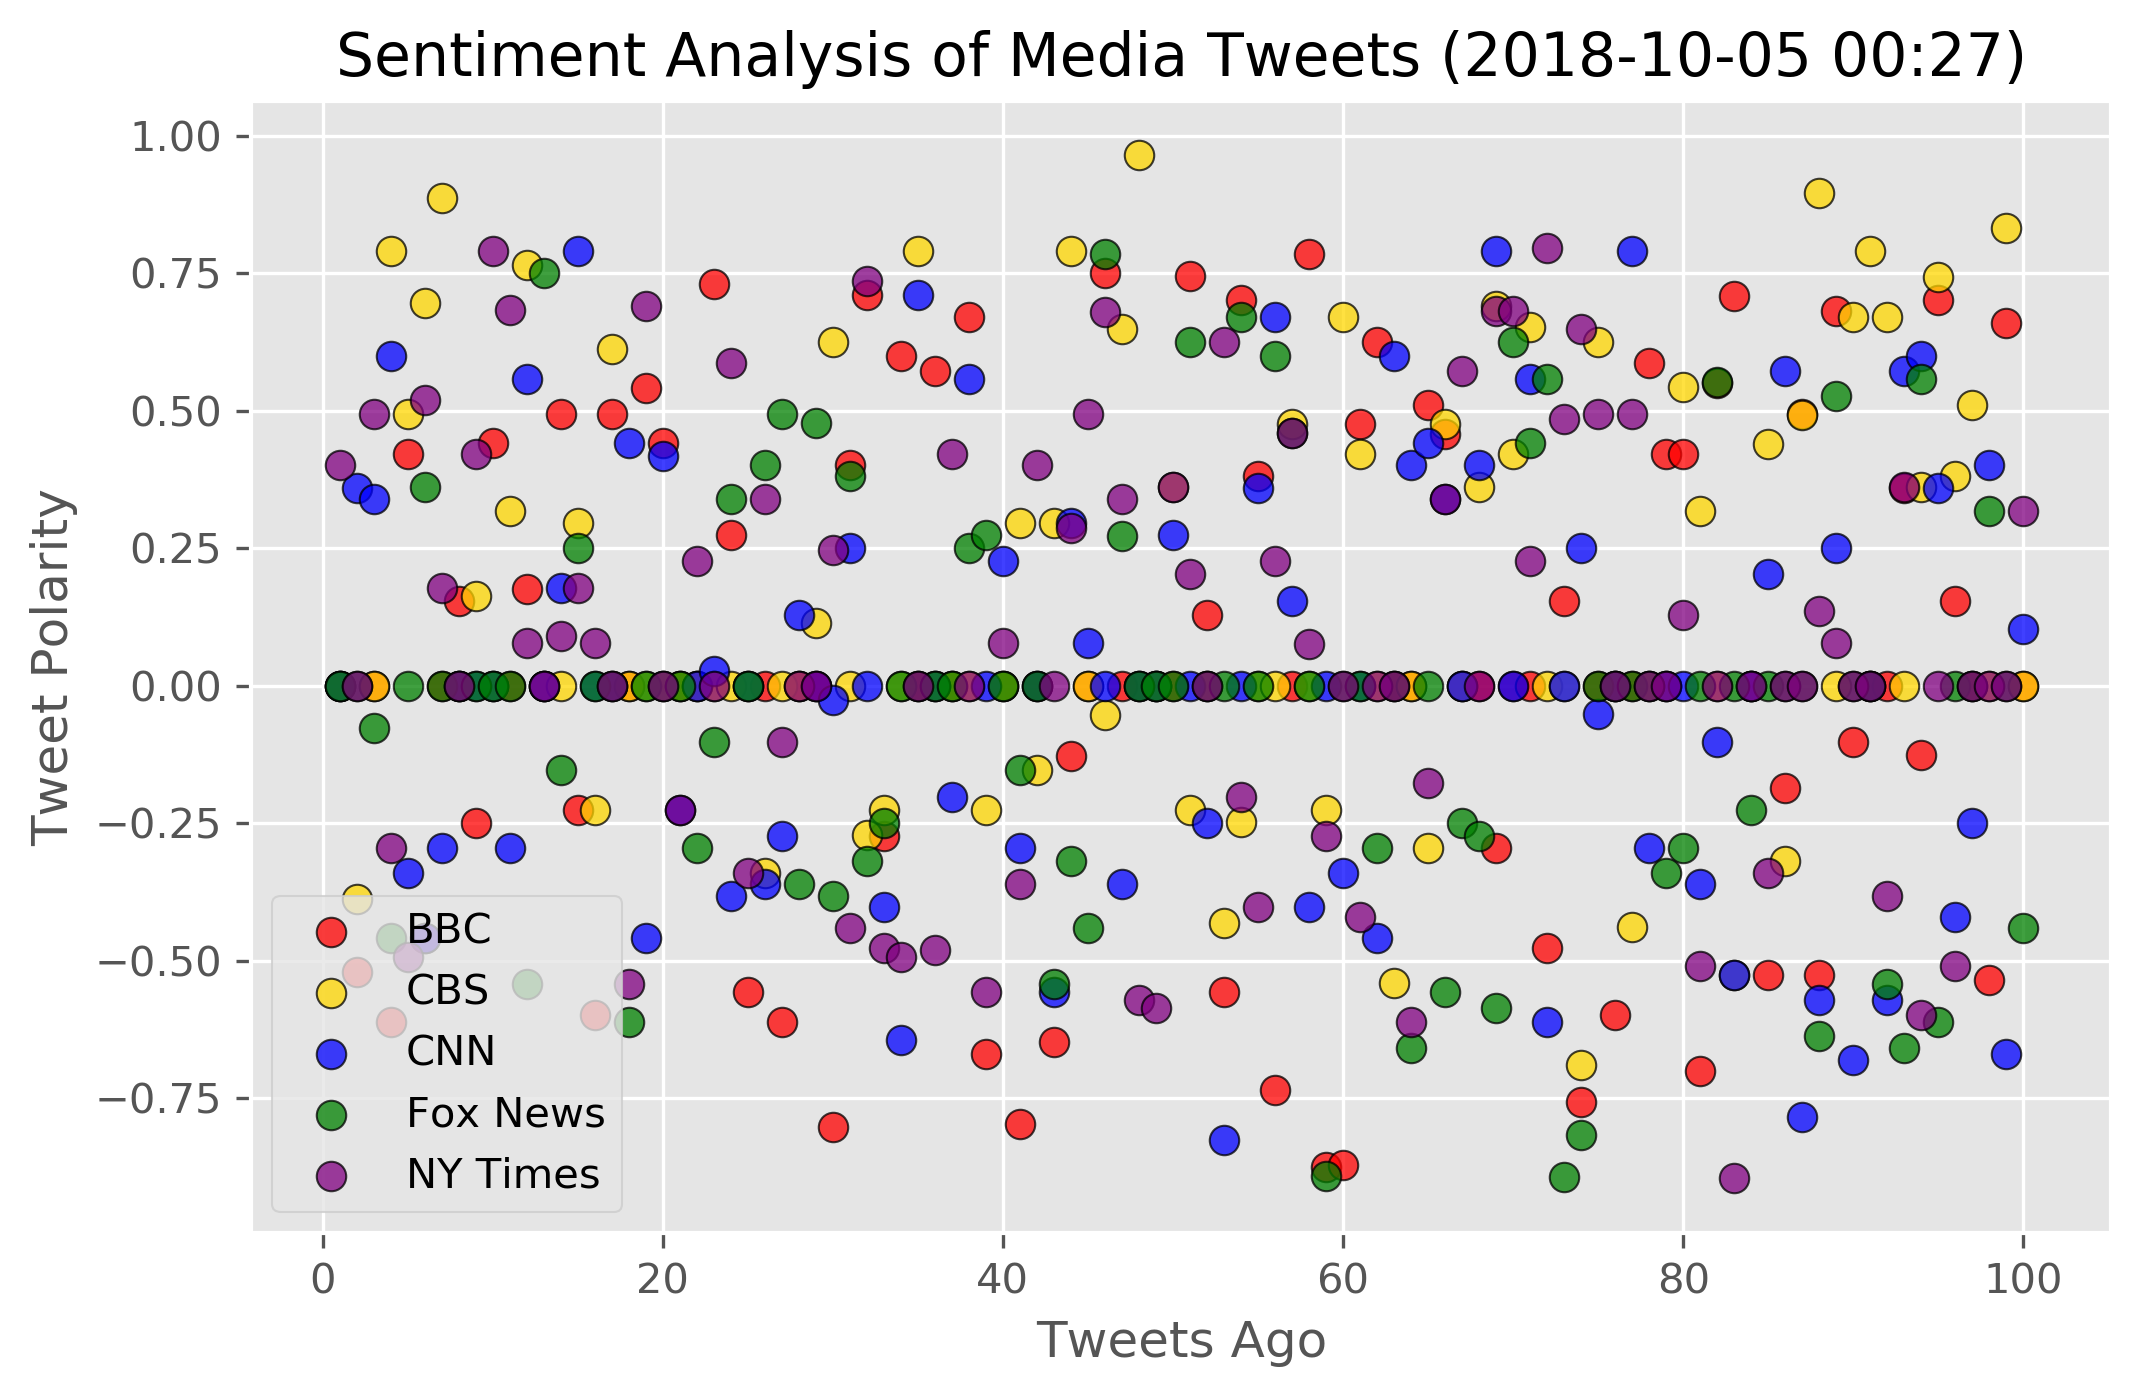

In [5]:
# bbc_df = sentiments_pd.loc[sentiments_pd["Company"] == "@BBC", :]
# bbc_df_mod = bbc_df.rename(columns = {"Tweets Ago": "BBC_Ago", "Compound": "CompoundBBC"})
# #bbc_df_mod
# bbc_sent = bbc_df_mod["CompoundBBC"]
# bbc_number = bbc_df_mod["BBC_Ago"]
#plt.figure(figsize=(8, 5), dpi=300)

bbc_df = sentiments_pd.loc[sentiments_pd["Company"] == "@BBC", :]
bbc_sent = bbc_df["Compound"]
bbc_number = bbc_df["Tweets Ago"]
plt.figure(figsize=(8, 5), dpi=300)
plt.scatter(bbc_number, bbc_sent, marker="o", color="red", label="BBC", alpha=.75, edgecolors="black", s=50)

cbs_df = sentiments_pd.loc[sentiments_pd["Company"] == "@CBS", :]
cbs_sent = cbs_df["Compound"]
cbs_number = cbs_df["Tweets Ago"]
plt.scatter(cbs_number, cbs_sent, marker="o", color="gold", label="CBS", alpha=.75, edgecolors="black", s=50)
#bbc_df
cnn_df = sentiments_pd.loc[sentiments_pd["Company"] == "@CNN", :]
cnn_sent = cnn_df["Compound"]
cnn_number = cnn_df["Tweets Ago"]
plt.scatter(cnn_number, cnn_sent, marker="o", color="blue", label="CNN", alpha=.75, edgecolors="black", s=50)

fox_df = sentiments_pd.loc[sentiments_pd["Company"] == "@FoxNews", :]
fox_sent = fox_df["Compound"]
fox_number = fox_df["Tweets Ago"]
plt.scatter(fox_number, fox_sent, marker="o", color="green", label="Fox News", alpha=.75, edgecolors="black", s=50)

nyt_df = sentiments_pd.loc[sentiments_pd["Company"] == "@NYTimes", :]
nyt_sent = nyt_df["Compound"]
nyt_number = nyt_df["Tweets Ago"]
plt.scatter(nyt_number, nyt_sent, marker="o", color="purple", label="NY Times", alpha=.75, edgecolors="black", s=50)
# Create plot
# x_vals = bbc_df["Tweets Ago"]
# y_vals = bbc_df["Compound"]
# plt.plot(x_vals,
#          y_vals, marker="o", color="gold",
#          alpha=0.8)

# plt.figure(figsize=(10, 5), dpi=300)
# plt.scatter(bbc_number, bbc_sent, marker="o", color="gold", alpha=.75, edgecolors="black")



# # # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
#plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_user}")
plt.title(f"Sentiment Analysis of Media Tweets ({now})")
#plt.xlim([x_vals.max(),x_vals.min()])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(True)
# Create a legend
plt.legend(loc="best")

plt.savefig("TwitterSentimentAnalysis.png")




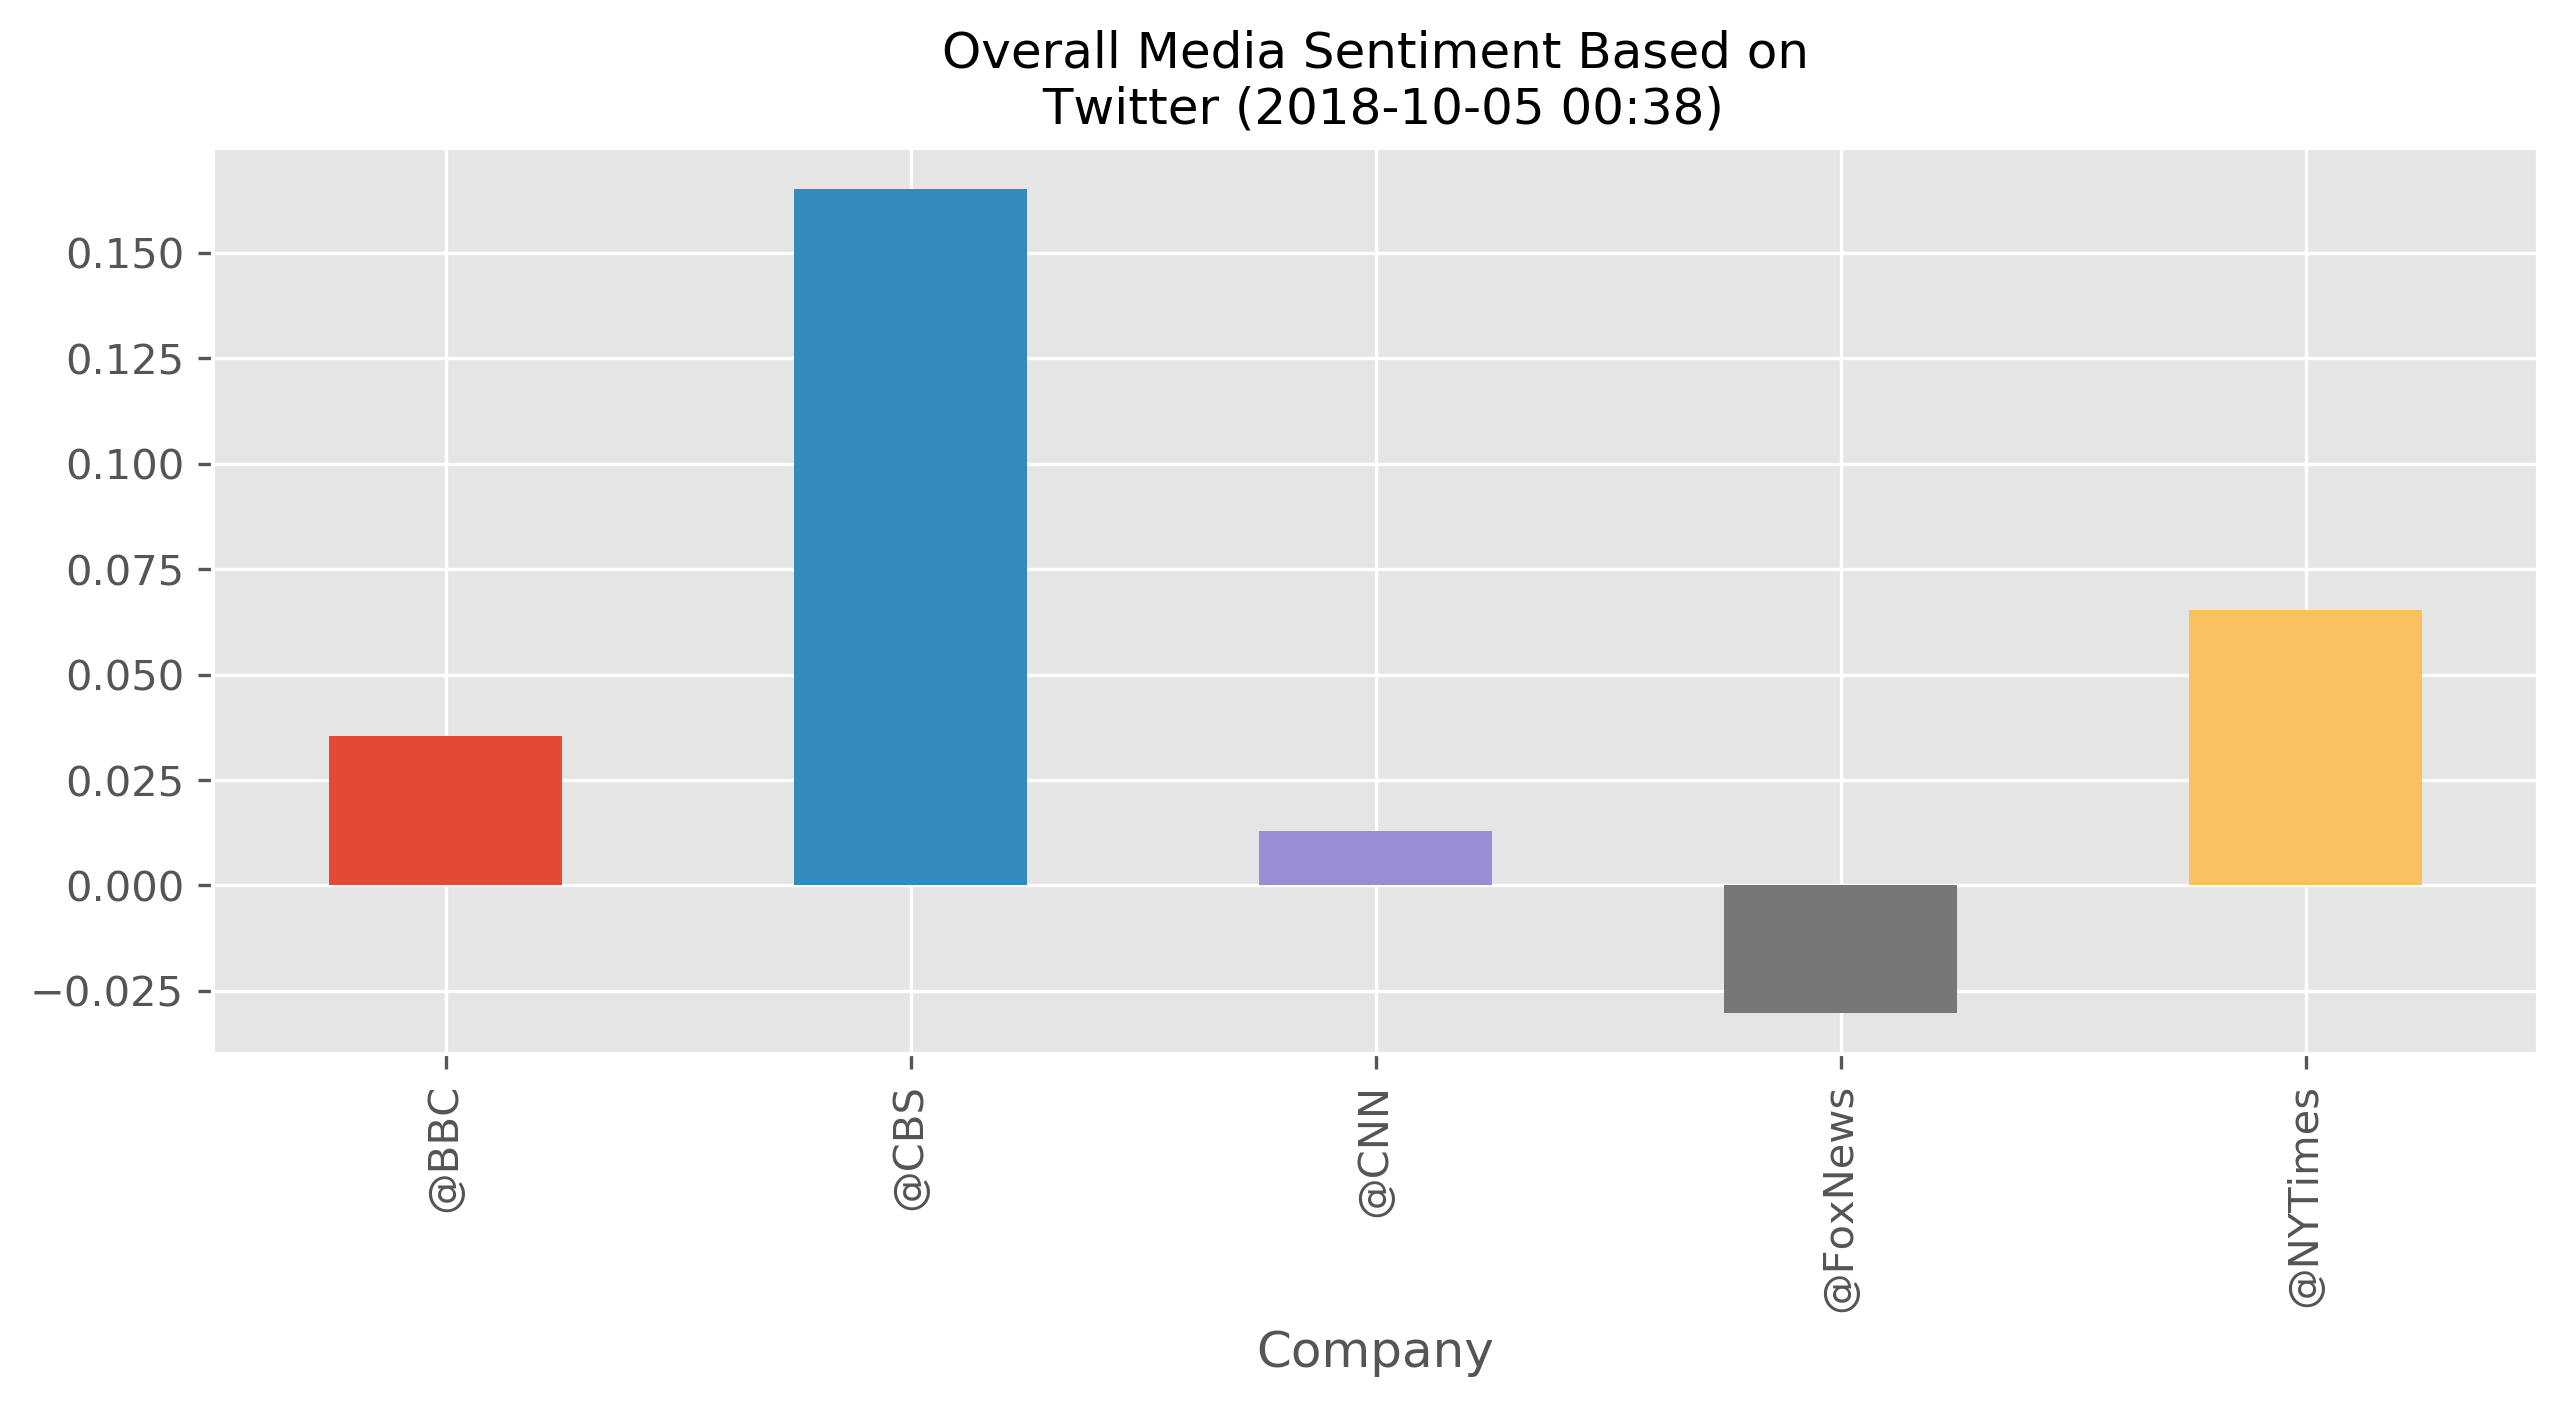

In [16]:
sentiments_groups = sentiments_pd.groupby(['Company'])
print(sentiments_groups)
sent_comp_avg = sentiments_groups["Compound"].mean()
# ########suburban_ride_count = suburban_groups["ride_id"].count()
# ######suburban_driver_count = suburban_groups["driver_count"].mean()
# sent_avg_table = pd.DataFrame({"company": Company,
#                                    "Sentiment Average": sent_comp_avg})
#sent_comp_avg
plt.figure(figsize=(10, 4), dpi=300)
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Overall Media Sentiment Based on\n Twitter ({now})", fontsize=12)
sentiment_chart = sent_comp_avg.plot(kind="bar")

plt.savefig("OverallSentimentAnalysis.png")
plt.show()
